In [296]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import feature_selection
from matplotlib.pyplot import figure

In [71]:
energy_efficiency_data = pd.read_csv('./energy_efficiency_data.csv')
# sns.pairplot(energy_efficiency_data, x_vars=["# Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Glazing Area"], y_vars=["Heating Load"], hue="Heating Load");

In [72]:
energy_efficiency_data = pd.read_csv('./energy_efficiency_data.csv')

keep_data = energy_efficiency_data[['Orientation', 'Glazing Area Distribution']]
energy_efficiency_data = energy_efficiency_data.drop(axis=1, columns=['Orientation', 'Glazing Area Distribution', 'Cooling Load'])

x = energy_efficiency_data.values
Normalizer = preprocessing.MinMaxScaler()
x_scaled = Normalizer.fit_transform(x)
energy_efficiency_data = pd.DataFrame(x_scaled, columns=energy_efficiency_data.columns)
energy_efficiency_data = energy_efficiency_data.join(keep_data)

categories = {1: 'uniform', 2: 'north', 3: 'east', 4: 'south', 5: 'west'}

for elem in energy_efficiency_data['Orientation'].unique():
    energy_efficiency_data['Orientation-'+categories[elem]] \
                                = (energy_efficiency_data['Orientation'] == elem).astype(int)
    
for elem in energy_efficiency_data['Glazing Area Distribution'].unique():
    if elem == 0:
        continue
    energy_efficiency_data['Glazing Area Distribution-'+categories[elem]] \
                                = (energy_efficiency_data['Glazing Area Distribution'] == elem).astype(int)
    
energy_efficiency_data = energy_efficiency_data.drop_duplicates()
energy_efficiency_data = energy_efficiency_data.drop(axis=1, columns=['Orientation', 'Glazing Area Distribution'])
energy_efficiency_data

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Orientation-north,Orientation-south,Orientation-west,Orientation-east,Glazing Area Distribution-uniform,Glazing Area Distribution-north,Glazing Area Distribution-east,Glazing Area Distribution-south,Glazing Area Distribution-west
0,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.257212,1,0,0,0,0,0,0,0,0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.257212,0,1,0,0,0,0,0,0,0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.257212,0,0,1,0,0,0,0,0,0
3,0.777778,0.166667,0.428571,0.111111,1.0,0.0,0.399838,1,0,0,0,0,0,0,0,0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.0,0.416554,0,0,0,1,0,0,0,0,0
5,0.777778,0.166667,0.428571,0.111111,1.0,0.0,0.396333,0,1,0,0,0,0,0,0,0
6,0.666667,0.250000,0.285714,0.333333,1.0,0.0,0.363710,1,0,0,0,0,0,0,0,0
7,0.666667,0.250000,0.285714,0.333333,1.0,0.0,0.375843,0,0,0,1,0,0,0,0,0
8,0.666667,0.250000,0.285714,0.333333,1.0,0.0,0.359396,0,1,0,0,0,0,0,0,0
9,0.555556,0.333333,0.428571,0.333333,1.0,0.0,0.307360,0,0,0,1,0,0,0,0,0


In [73]:
energy_efficiency_data.describe()

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Orientation-north,Orientation-south,Orientation-west,Orientation-east,Glazing Area Distribution-uniform,Glazing Area Distribution-north,Glazing Area Distribution-east,Glazing Area Distribution-south,Glazing Area Distribution-west
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.585938,0.439396,0.250000,0.250000,0.250000,0.250000,0.187500,0.187500,0.187500,0.187500,0.187500
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.333051,0.272046,0.433295,0.433295,0.433295,0.433295,0.390567,0.390567,0.390567,0.390567,0.390567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.188258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.625000,0.348881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.583333,0.770833,0.571429,1.000000,1.000000,1.000000,0.691763,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [427]:
y = energy_efficiency_data['Heating Load']
X = energy_efficiency_data.drop(axis=1, columns=['Heating Load'])

selector = feature_selection.VarianceThreshold(threshold=0.08)
X_new = selector.fit_transform(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, y, test_size=0.25)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = y_test.values.reshape(len(y_test), 1)
y_train = y_train.values.reshape(len(y_train), 1)

In [428]:
class NeuralNetwork:        
    def __init__(self, structure, learning_rate = 0.05, batch_size=32):
        np.random.seed(0)
        self.w0 = np.random.rand(structure[0], structure[1])
        np.random.seed(0)
        self.w1 = np.random.rand(structure[1], structure[2])
        np.random.seed(0)
        self.w2 = np.random.rand(structure[2], structure[3])

        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
    def feedforward(self, X):
        self.layer0 = X
        self.layer1 = self.sigmoid(np.dot(self.layer0, self.w0))
        self.layer2 = self.sigmoid(np.dot(self.layer1, self.w1))
        self.layer3 = self.sigmoid(np.dot(self.layer2, self.w2))

        return self.layer3
        
    def backprop(self, X, y_target, y_predict):
        layer3_error = (y_target - y_predict)
        layer3_delta = layer3_error * self.sigmoid_derivative(self.layer3)

        layer2_error = layer3_delta.dot(self.w2.T)
        layer2_delta = layer2_error * self.sigmoid_derivative(self.layer2)
        
        layer1_error = layer2_delta.dot(self.w1.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        
        self.w2 += self.layer2.T.dot(layer3_delta) * self.learning_rate
        self.w1 += self.layer1.T.dot(layer2_delta) * self.learning_rate
        self.w0 += self.layer0.T.dot(layer1_delta) * self.learning_rate
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, s):
        return s * (1 - s)
    
    def predict(self, x):
        return self.feedforward(x)
    
    def train(self, X, y_target, epochs=1000):
        num_train = len(X)
        for i in xrange(epochs):
            for start_idx in range(0, num_train, self.batch_size):
                X_batch = X[start_idx:start_idx+self.batch_size,:]
                y_batch = y_target[start_idx:start_idx+self.batch_size,:]
                
                y_pred = self.feedforward(X_batch)
                self.backprop(X_batch, y_batch, y_pred)
            
            training_loss.append(self.calculate_loss(X, y_target))
    
    def calculate_loss(self, X, y):
        return np.sqrt(np.mean(np.square(y - self.predict(X))))

In [429]:
training_loss = []
NN = NeuralNetwork(structure=[X_train.shape[1], 10, 10, 1])
NN.train(X_train, y_train, epochs=1000)

## Full
### Train E-RMS: 0.070607781894448
### Test E-RMS: 0.07997004319812093

## Selected
### Train E-RMS: 0.09439776621130826
### Test E-RMS: 0.10935584209012876

Train E-RMS: 0.0715668974322173
Test E-RMS: 0.0795943427509946


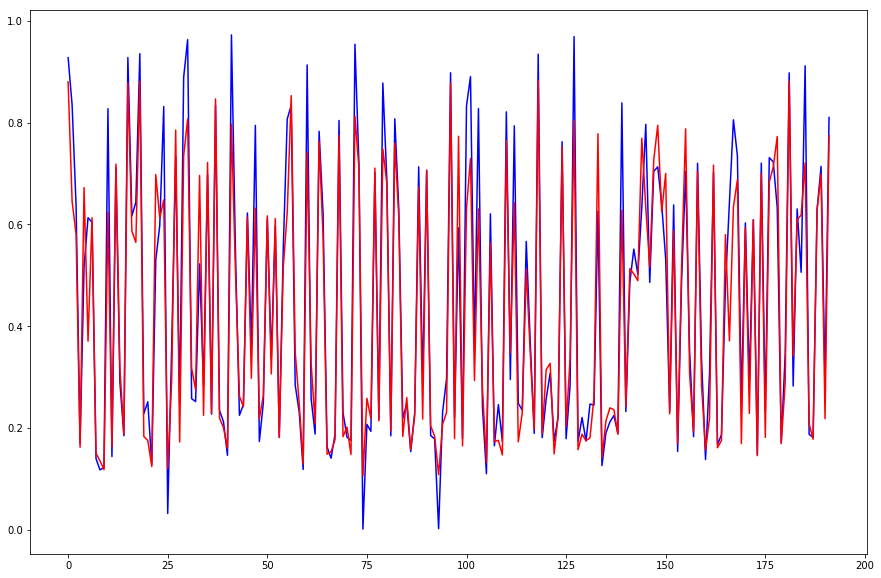

In [430]:
train_loss = NN.calculate_loss(X_train, y_train)
print 'Train E-RMS:',train_loss

y_predict = NN.predict(X_test)

test_loss = NN.calculate_loss(X_test, y_test)
print 'Test E-RMS:',test_loss

plt.figure(figsize=(15,10))
plt.plot(y_test, 'b')
plt.plot(y_predict, 'r')

plt.show()

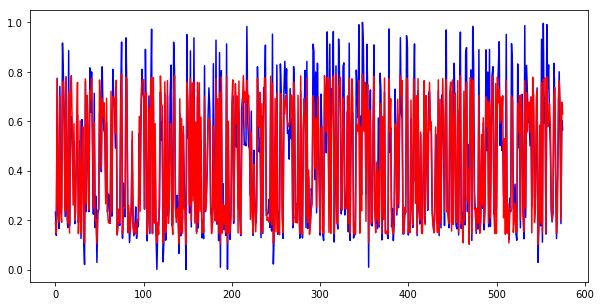

In [410]:
y_predict = NN.predict(X_train)
plt.figure(figsize=(10,5))
plt.plot(y_train, 'b')
plt.plot(y_predict, 'r')

plt.show()

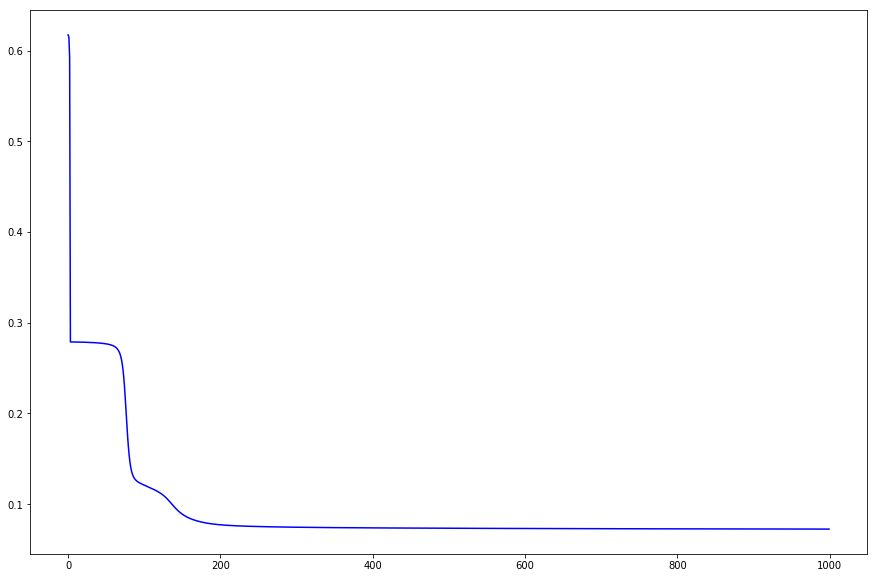

In [405]:
tmp = np.array(training_loss)
plt.figure(figsize=(15,10))
plt.plot(training_loss, 'b')
plt.show()

In [305]:
energy_efficiency_data = pd.read_csv('./energy_efficiency_data.csv')
y = energy_efficiency_data['Heating Load']
X = energy_efficiency_data.drop(axis=1, columns=['Heating Load'])

X_new = feature_selection.SelectKBest(feature_selection.f_regression, k=7).fit_transform(X, y)

In [306]:
X_new.shape

(768, 7)

In [307]:
X_new[1,:]

array([  0.98, 514.5 , 294.  , 110.25,   7.  ,   0.  ,  21.33])

In [369]:
energy_efficiency_data = pd.read_csv('./energy_efficiency_data.csv')

keep_data = energy_efficiency_data[['Orientation', 'Glazing Area Distribution']]
energy_efficiency_data = energy_efficiency_data.drop(axis=1, columns=['Orientation', 'Glazing Area Distribution', 'Cooling Load'])

x = energy_efficiency_data.values
Normalizer = preprocessing.MinMaxScaler()
x_scaled = Normalizer.fit_transform(x)
energy_efficiency_data = pd.DataFrame(x_scaled, columns=energy_efficiency_data.columns)
energy_efficiency_data = energy_efficiency_data.join(keep_data)

categories = {1: 'uniform', 2: 'north', 3: 'east', 4: 'south', 5: 'west'}

for elem in energy_efficiency_data['Orientation'].unique():
    energy_efficiency_data['Orientation-'+categories[elem]] \
                                = (energy_efficiency_data['Orientation'] == elem).astype(int)
    
for elem in energy_efficiency_data['Glazing Area Distribution'].unique():
    if elem == 0:
        continue
    energy_efficiency_data['Glazing Area Distribution-'+categories[elem]] \
                                = (energy_efficiency_data['Glazing Area Distribution'] == elem).astype(int)
    
energy_efficiency_data = energy_efficiency_data.drop_duplicates()
energy_efficiency_data = energy_efficiency_data.drop(axis=1, columns=['Orientation', 'Glazing Area Distribution'])
energy_efficiency_data

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Orientation-north,Orientation-south,Orientation-west,Orientation-east,Glazing Area Distribution-uniform,Glazing Area Distribution-north,Glazing Area Distribution-east,Glazing Area Distribution-south,Glazing Area Distribution-west
0,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.257212,1,0,0,0,0,0,0,0,0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.257212,0,1,0,0,0,0,0,0,0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.257212,0,0,1,0,0,0,0,0,0
3,0.777778,0.166667,0.428571,0.111111,1.0,0.0,0.399838,1,0,0,0,0,0,0,0,0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.0,0.416554,0,0,0,1,0,0,0,0,0
5,0.777778,0.166667,0.428571,0.111111,1.0,0.0,0.396333,0,1,0,0,0,0,0,0,0
6,0.666667,0.250000,0.285714,0.333333,1.0,0.0,0.363710,1,0,0,0,0,0,0,0,0
7,0.666667,0.250000,0.285714,0.333333,1.0,0.0,0.375843,0,0,0,1,0,0,0,0,0
8,0.666667,0.250000,0.285714,0.333333,1.0,0.0,0.359396,0,1,0,0,0,0,0,0,0
9,0.555556,0.333333,0.428571,0.333333,1.0,0.0,0.307360,0,0,0,1,0,0,0,0,0


In [423]:
y = energy_efficiency_data['Heating Load']
X = energy_efficiency_data.drop(axis=1, columns=['Heating Load'])

selector = feature_selection.VarianceThreshold(threshold=0.08)
X_new = selector.fit_transform(X)
X_new

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11111111, 0.83333333, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.05555556, 0.91666667, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [424]:
X_new.shape

(768, 14)

In [425]:
X.shape

(768, 15)

In [426]:
selector.get_support(indices=True)

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [391]:
selector.variances_

array([0.08622149, 0.08965085, 0.06462585, 0.16760974, 0.25      ,
       0.11077881, 0.1875    , 0.1875    , 0.1875    , 0.1875    ,
       0.15234375, 0.15234375, 0.15234375, 0.15234375, 0.15234375])

In [431]:
X.describe()

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Orientation-north,Orientation-south,Orientation-west,Orientation-east,Glazing Area Distribution-uniform,Glazing Area Distribution-north,Glazing Area Distribution-east,Glazing Area Distribution-south,Glazing Area Distribution-west
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.585938,0.250000,0.250000,0.250000,0.250000,0.187500,0.187500,0.187500,0.187500,0.187500
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.333051,0.433295,0.433295,0.433295,0.433295,0.390567,0.390567,0.390567,0.390567,0.390567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.583333,0.770833,0.571429,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
